Import some stuff

In [1]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def figsize(width,height):
    rcParams['figure.figsize'] = (width,height)

In [3]:
interactive = False
if interactive:
    %matplotlib notebook
    figsize(12,8)
else:
    %matplotlib inline
    figsize(17,8)

rcParams['font.size'] = 14
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)

# Lorenz system

Define basic Lorenz system ODE

In [4]:
def lorenz_grad(xx, sigma=10., rho=28., beta=8./3):
    '''Return gradient to follow'''
    x,y,z = xx
    return array([
        rho * (y - x),
        x * (rho - z) - y,
        x * y - beta * z,
    ])

Define the step / transition function that takes a step along the ODE

In [5]:
def lorenz_step(xx, lr, sigma=10., rho=28., beta=8./3):
    '''Next point'''
    return xx + lr * lorenz_grad(xx, sigma, rho, beta)

Compute Jacobian and spectral radius

In [6]:
def lorenz_step_jacobian(xx, lr, sigma=10., rho=28., beta=8./3):
    '''Jacobian of lorenz_step transformation'''
    x,y,z = xx
    lorenz_grad_jacobian = array([
        [-rho, rho, 0],
        [rho - z, -1, -x],
        [y, x, -beta],
    ])
    
    # from email: Jacobian of D
    #return lorenz_grad_jacobian
    # from email: Jacobian of lr*D
    #return lr * lorenz_grad_jacobian
    # from email: Jacobian of T
    return eye(3) + lr * lorenz_grad_jacobian


def lorenz_step_spec_rad(xx, lr, sigma=10., rho=28., beta=8./3):
    ''' Compute spectral radius of lorenz step function'''
    return max(abs(eig(lorenz_step_jacobian(xx, lr, sigma, rho, beta))[0]))

Pick a point to start at (some point on a stable orbit)

In [7]:
x0 = array([ -4.08,  -5.26,  15.51])     # start at some point on orbit

Main simulation + plot

In [8]:
def simulate_and_plot(lr, n_steps, plot2d=True, plot3d=False):
    tt = linspace(0, lr*n_steps, n_steps)
    vals = zeros((n_steps, 3))
    specrad = zeros(n_steps)

    vals[0] = x0[:]
    specrad[0] = lorenz_step_spec_rad(x0, lr)

    for ii in xrange(1, n_steps):
        vals[ii] = lorenz_step(vals[ii-1], lr)
        specrad[ii] = lorenz_step_spec_rad(vals[ii-1], lr)
    
    
    # plot 2 (2D)
    if plot2d:
        figure()
        subplot(2,1,1)
        plot(vals[:,1], vals[:,2], c=[0,0,0,.3], zorder=11)
        scatter(vals[:,1], vals[:,2], c=cm.viridis(tt/tt[-1]), zorder=12)
        title('path (purple -> yellow)')
        subplot(2,1,2)
        plot(tt, specrad, c=[0,0,0,.3], zorder=11)
        scatter(tt, specrad, c=cm.viridis(tt/tt[-1]), zorder=12)
        title('spectral radius')

    # plot 3 (3D)
    if plot3d:
        fig = figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(vals[:,0], vals[:,1], vals[:,2], c=[0,0,0,.3], zorder=11)
        ax.scatter(vals[:,0], vals[:,1], vals[:,2], c=cm.viridis(tt/tt[-1]), zorder=12)

### Base case

LR .01 for 1000 steps

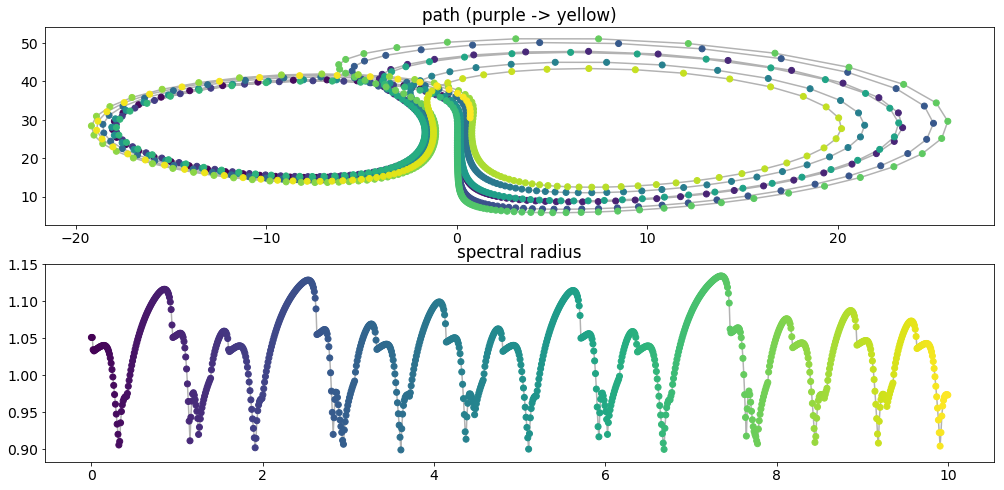

In [9]:
simulate_and_plot(.01, 1000)

Note that Radius is centered at 1.0


### Raising the LR

Now, double the LR and half the number of steps, keeping the total nominal distance traveled fixed at LR * n_steps = 10

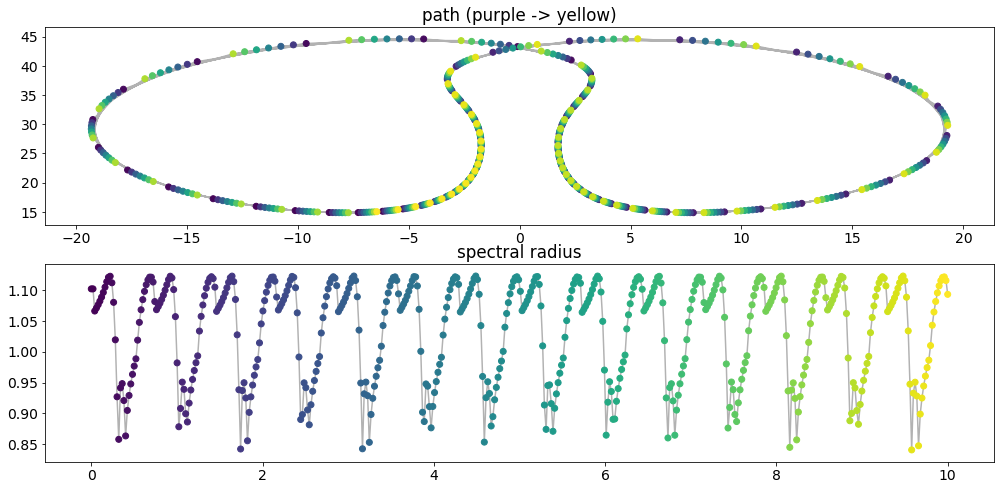

In [10]:
simulate_and_plot(.02, 500)

The system is actually strangely less chaotic now, probably just an artifact of this exact learning rate (?). The spectral radius is still centered at 1.

Raise LR a little more

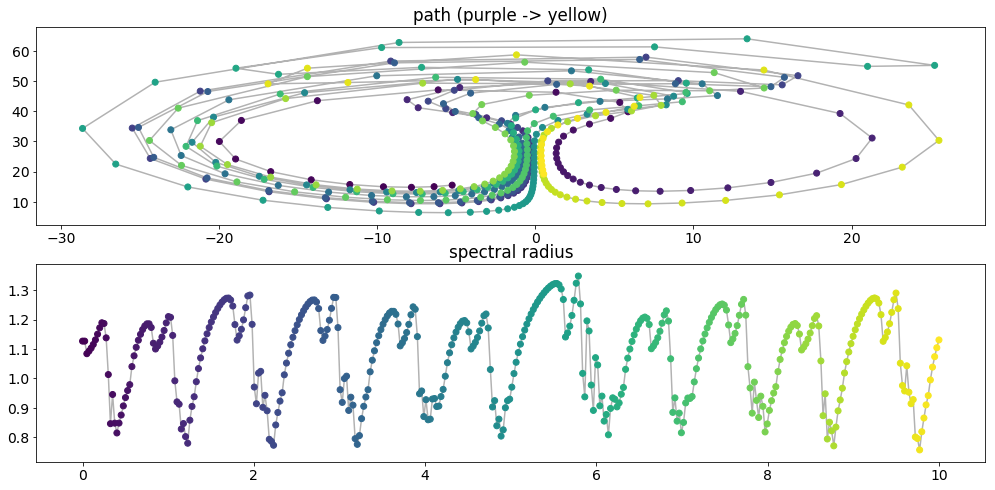

In [11]:
simulate_and_plot(.025, 400)

Now system is back to similar chaos.

If we raise the LR much higher, the system diverges:

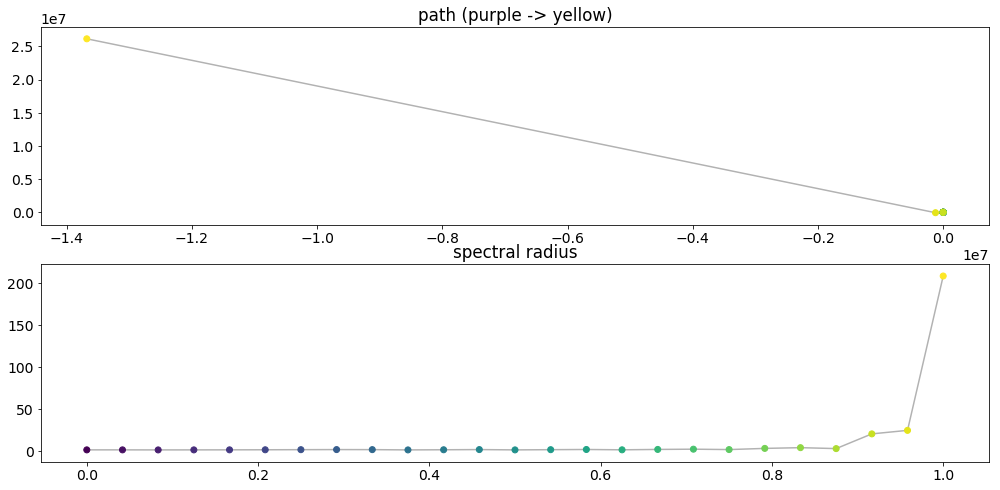

In [12]:
simulate_and_plot(.04, 25)

### Lowering the LR

Now we can try lowering the LR from the base case, again keeping the total nominal distance traveled fixed at LR * n_steps = 10

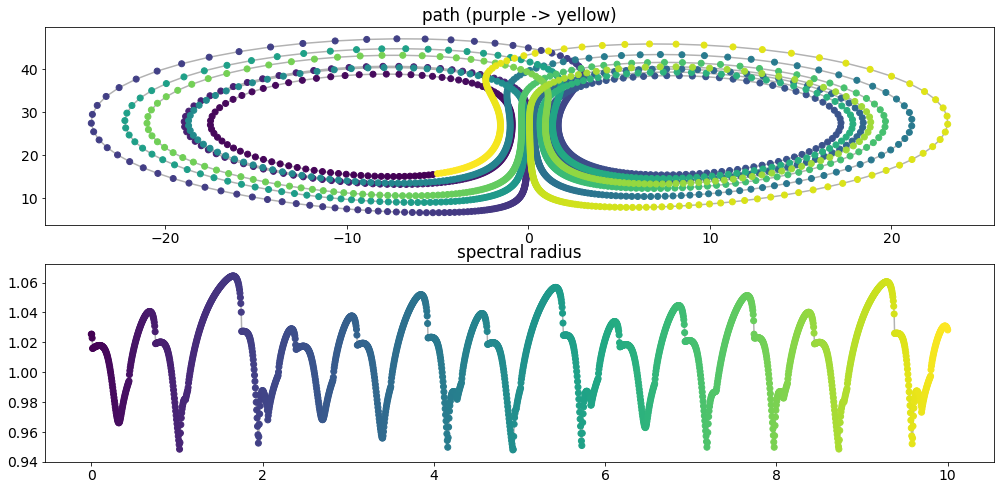

In [13]:
simulate_and_plot(.005, 2000)

Lowering the LR more still produces chaos and SR around 1

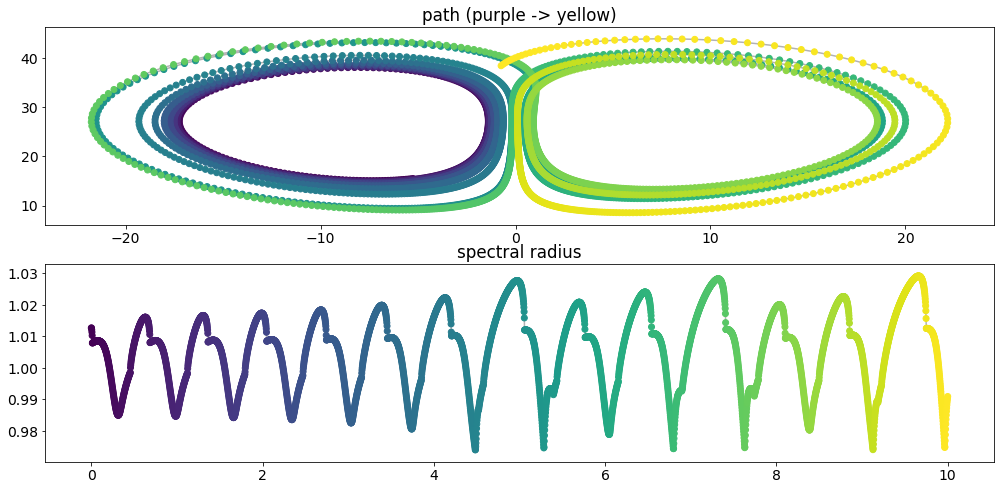

In [14]:
simulate_and_plot(.0025, 4000)

Strangely, lowering it even more produces no more chaos. This could be some issue of numerical precision (?), because the system should still be chaotic for arbitrarily small steps.

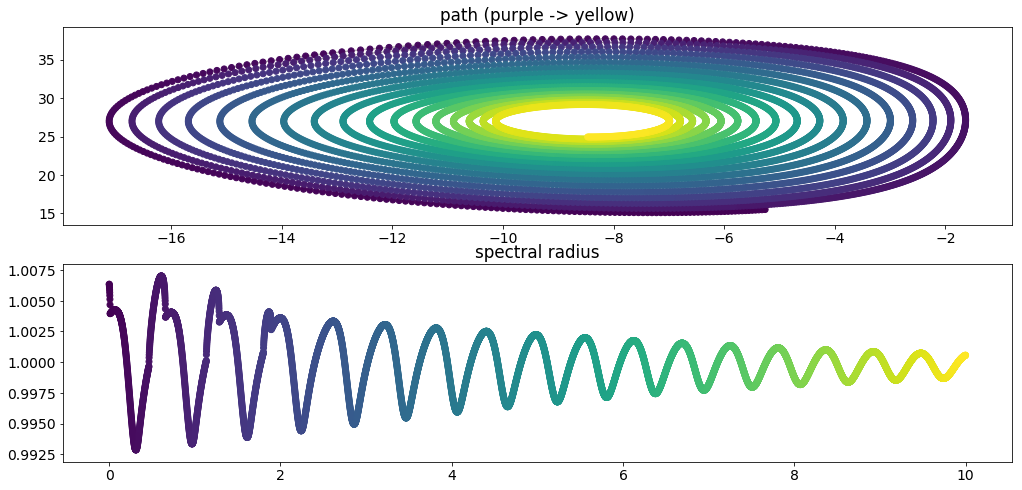

In [15]:
simulate_and_plot(.00125, 8000)

Scratch

In [ ]:
# Per-dimension plots
figure()
subplot(2,1,1)
plot(tt, vals[:,0], 'o-')
plot(tt, vals[:,1], 'o-')
plot(tt, vals[:,2], 'o-')
subplot(2,1,2)
plot(tt, specrad)
